# Introduction to Python
## GradQuant Workshops  Winter 2023 

## Presentedr by: Da Gong
##    $~~~~~~~~~~~~~~~~~~~~~~~$ PhD Candidate in Economics / GradQuant Lead Consultant
### $~~~~~~~~~~~~~~~~~~~~~~~~~~~~$  dgong005@ucr.edu &nbsp; /&nbsp; gradquant@ucr.edu

## Credit: Michael Remington, Ruihan Lu and Matthew Brett

## Recommended Textbook: Data Science for Everyone 
###  https://matthew-brett.github.io/dsfe/

## Why Python
### Some Examples

In [ ]:
# Example 1 

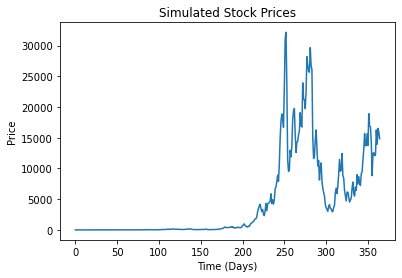

In [30]:
# If you don't see the plot, it might be due to the backend of Matplotlib not being properly configured. You can try the following command to change the backend:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define number of simulation steps
num_steps = 365

# Define the daily mean and standard deviation of returns
mean = 0.05
std = 0.2

# Simulate daily returns using normal distribution
returns = np.random.normal(mean, std, num_steps)

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + returns)

# Plot the simulated stock prices
plt.plot(range(num_steps), cumulative_returns)
plt.title("Simulated Stock Prices")
plt.xlabel("Time (Days)")
plt.ylabel("Price")
plt.show()


In [25]:
# Example 2 
# If you don't see the plot, it might be due to the backend of Matplotlib not being properly configured. You can try the following command to change the backend:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D 
from scipy.stats import multivariate_normal

#Ref: https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d


In [26]:
#Parameters to set
mu = np.array([1,2])
Sigma = np.array([[3,4],[-2,15]])
print('mu=',mu)
print('Sigma=',Sigma)


mu= [1 2]
Sigma= [[ 3  4]
 [-2 15]]


<IPython.core.display.Javascript object>


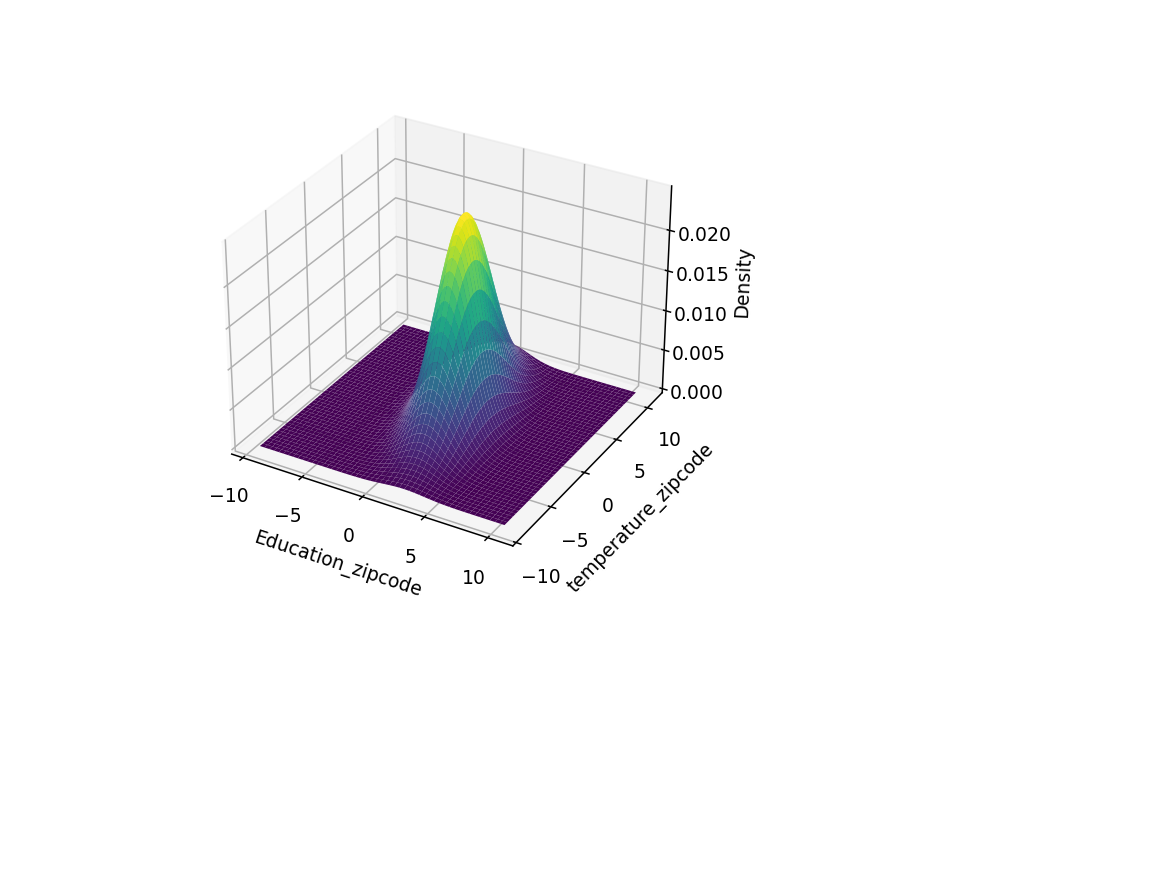

In [27]:
#Create grid and multivariate normal
x = np.linspace(-9.5,10.5,500)
y = np.linspace(-9,11,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mu, Sigma)
#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('Education_zipcode')
ax.set_ylabel('temperature_zipcode')
ax.set_zlabel('Density')
plt.show()

<IPython.core.display.Javascript object>


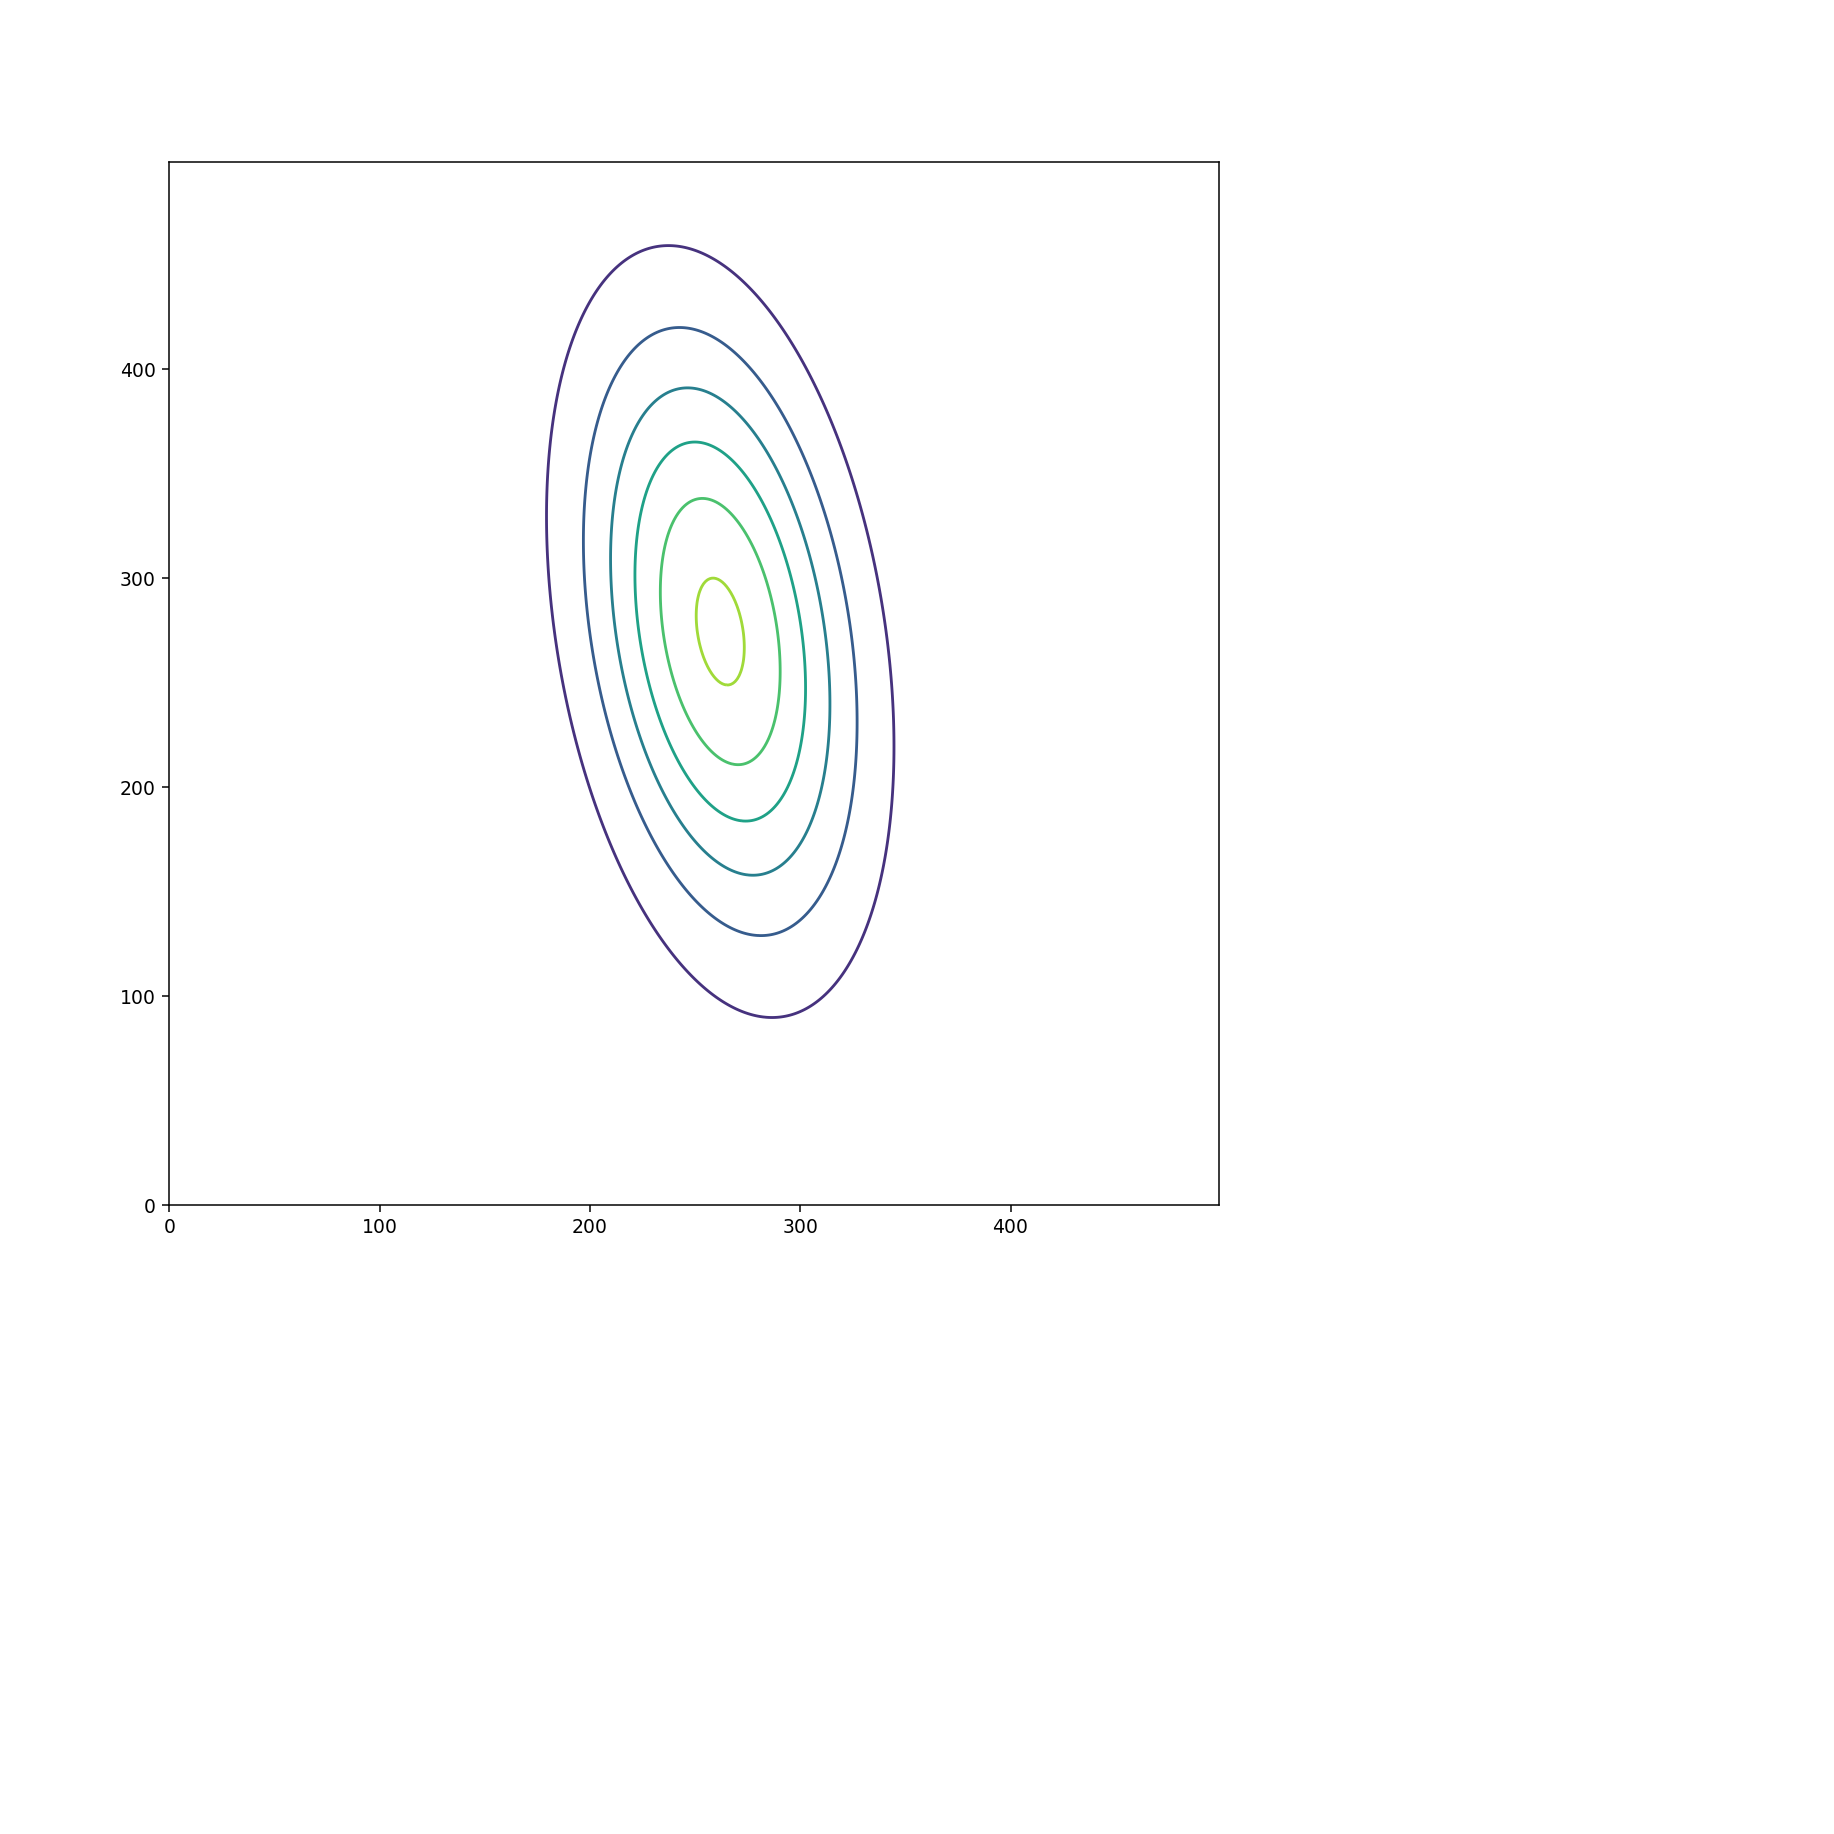

In [28]:
## CONTOUR PLOTS OF THE BIVARIATE DISTRIBUTION
pos = np.array([X.flatten(),Y.flatten()]).T

rv = multivariate_normal(mu, Sigma)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.contour(rv.pdf(pos).reshape(500,500))
plt.show()



<IPython.core.display.Javascript object>


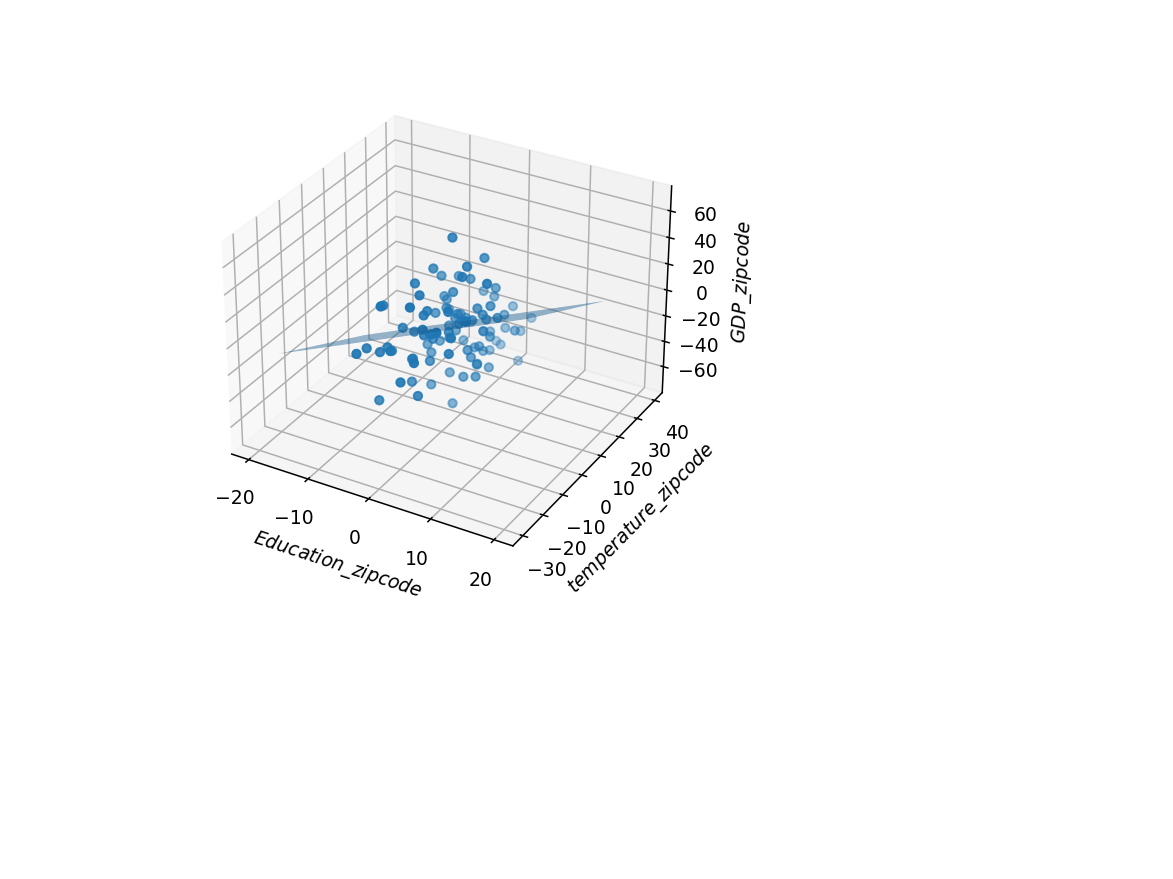

In [29]:
#GDP=b1*edu+b2*tem+error

X1= np.random.normal(mu[0], Sigma[0][0], 100)[:,np.newaxis]
X2=np.random.normal(mu[1], Sigma[1][1], 100)[:,np.newaxis]

X=np.hstack((X1,X2))

b = np.array([2,-1])
sd = 25
error=np.random.randn(100)*sd
Y = X@b+error

b_hat = np.linalg.inv(X.T@X)@X.T@Y



fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

X_grid,Y_grid = np.meshgrid(np.linspace(-20,20,10),np.linspace(-20,20,10))
Z_grid = X_grid*b[0]+Y_grid*b[1]
ax.plot_surface(X_grid,Y_grid,Z_grid,alpha=0.5)

ax.set_zlabel('$GDP\_zipcode$')
ax.set_xlabel('$Education\_zipcode$')
ax.set_ylabel('$temperature\_zipcode$')
plt.show()

In [ ]:
# Example 3 
# ref: Gong, Da and Yan, Andong and Yu, Jialin, Cost of Zero-Covid: Effects of Anti-Contagious Policy on Labor Market Outcomes in China (December 9, 2022). Available at SSRN: https://ssrn.com/abstract=4037688 or http://dx.doi.org/10.2139/ssrn.4037688

In [32]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
from copy import deepcopy
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [33]:
base = datetime. datetime(2020, 1, 23)
dates = [base + datetime.timedelta(days = i) for i in range(28)]
N = len(dates)


np.random.seed(19680801)
y=np.random.randint(5, size=28)

for i in range (14,28):
    y[i] = 0 

z = deepcopy(y)
z[13]=2
z[14]=0
z[17]=1

n = 35
colors1 =['tab:blue']
colors1 = [item for item in colors1 for i in range(n)]
colors1[13]='tab:pink'

colors2 =['tab:blue']
colors2 = [item for item in colors1 for i in range(n)]
colors2[13]='tab:pink'
colors2[17]='tab:pink'


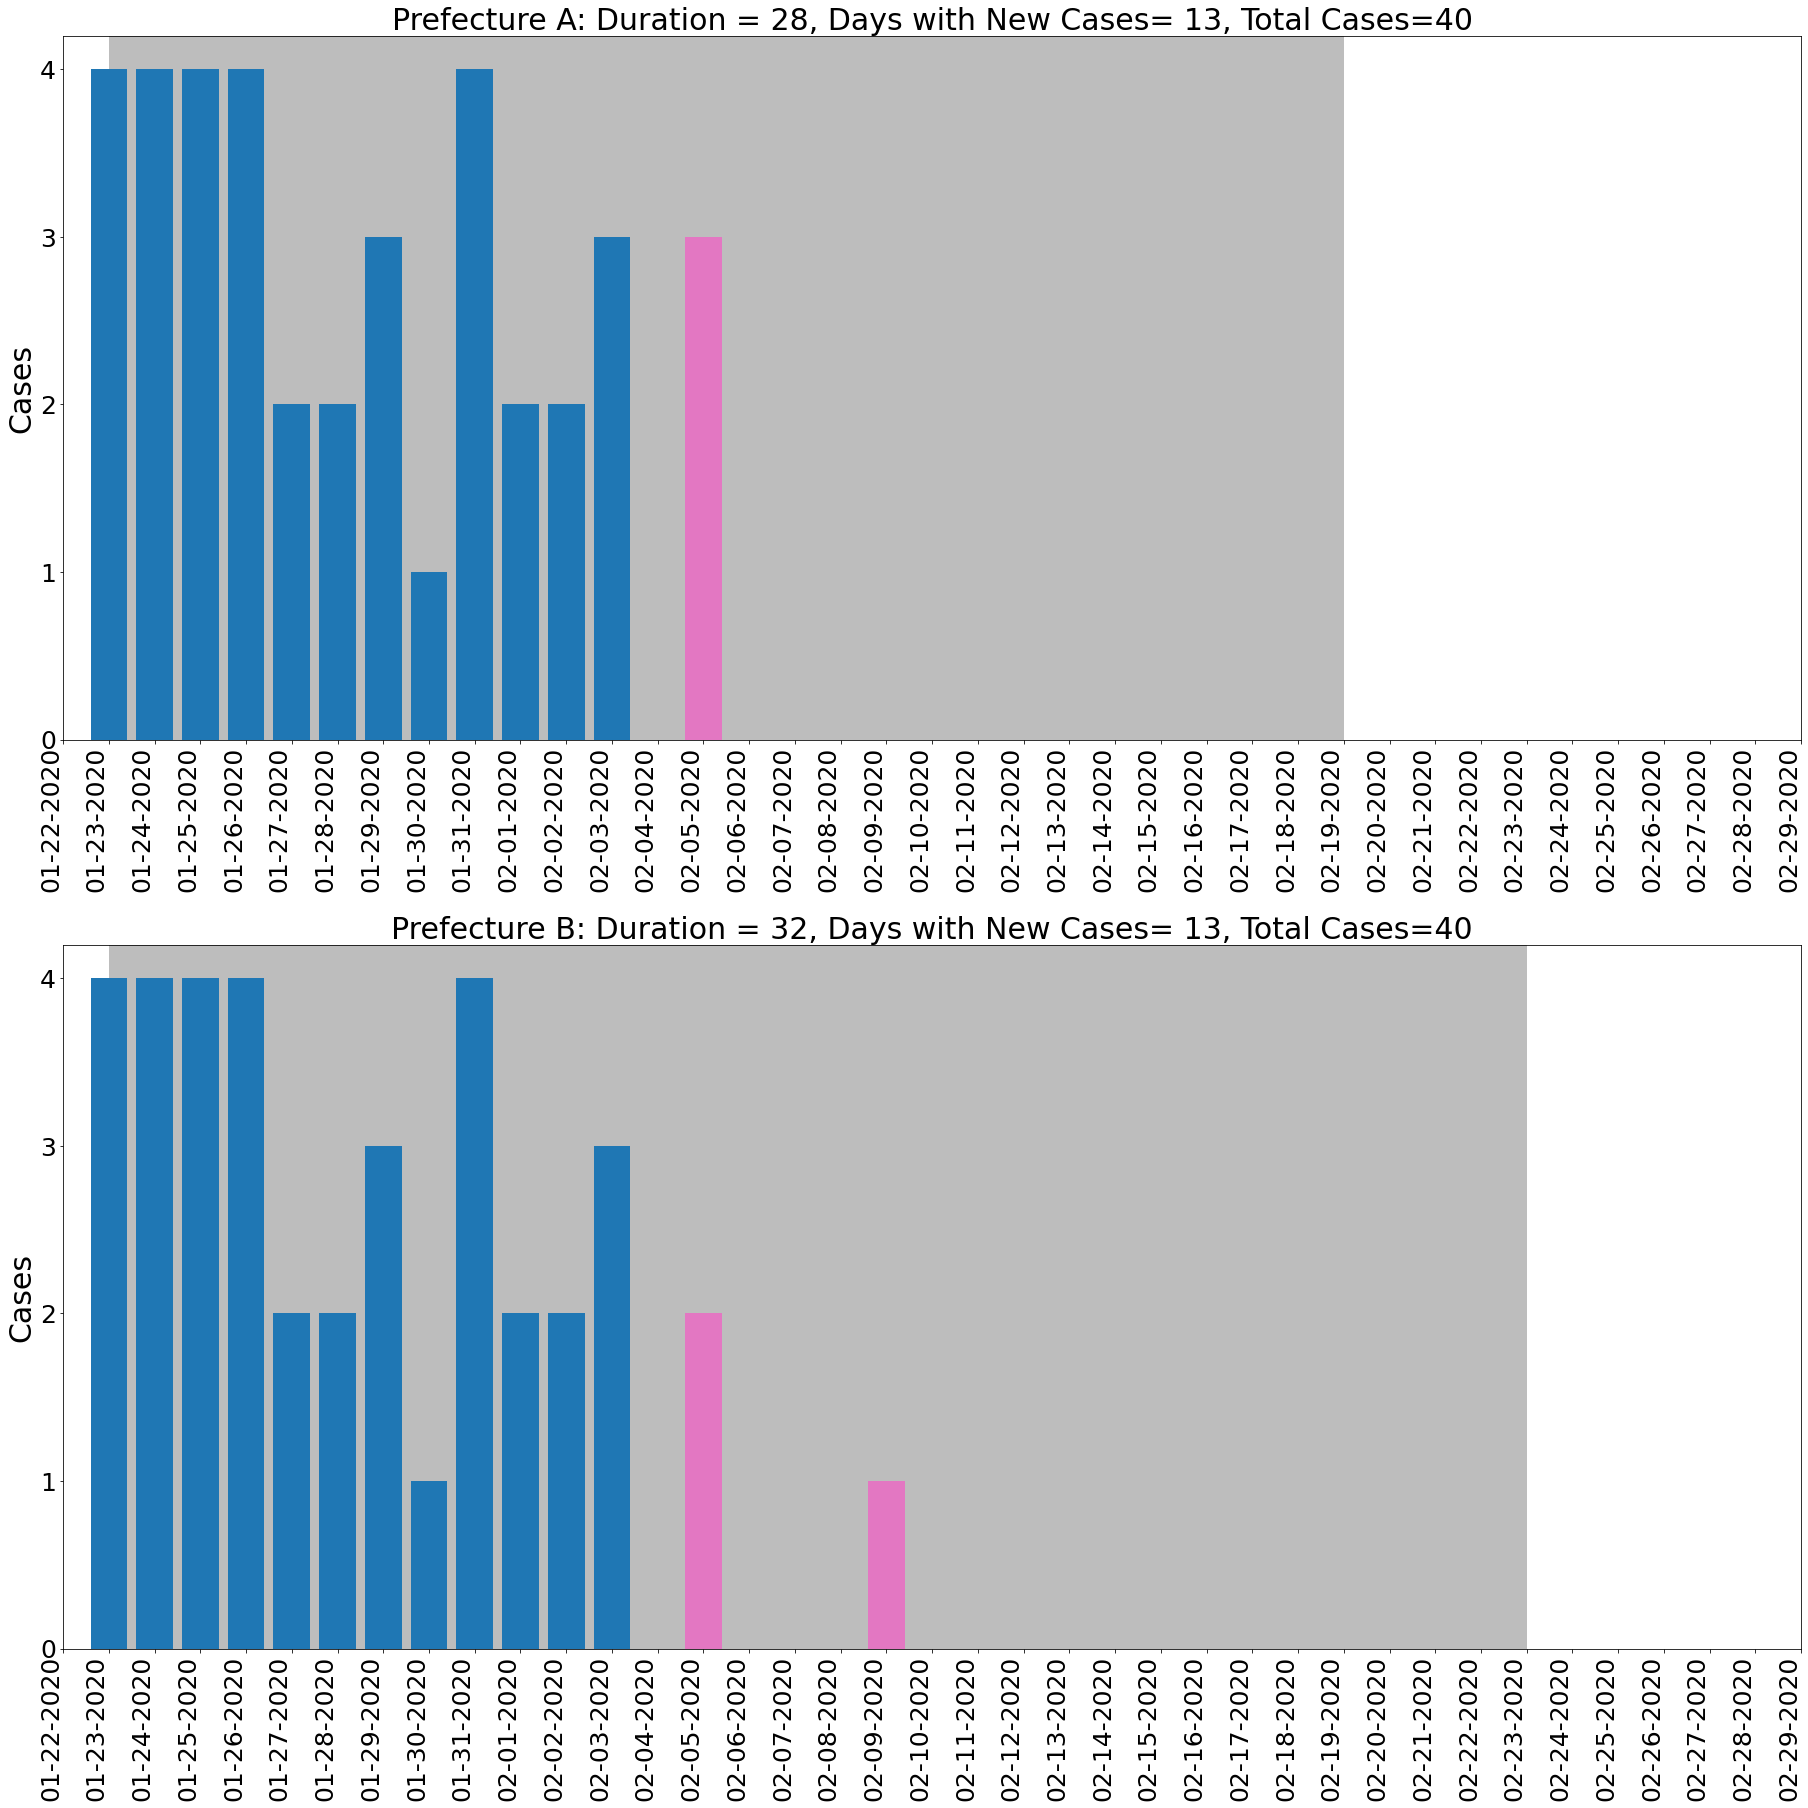

In [34]:
colors=[colors1,colors2]
##
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(25, 25))
outcome=[y,z]


color2=[]
for nn, ax in enumerate(axs):
    ax.bar(dates, outcome[nn],color=colors[nn])
    
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
    ax.set_xlim([datetime.date(2020, 1, 22), datetime.date(2020, 2, 29)])
    

    
    
    
    ###
    plt.setp(ax.get_yticklabels(), fontsize=25)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_ylabel('Cases', fontsize = 30.0) 
    # rotate_labels...
    plt.setp(ax.get_xticklabels(), fontsize=25)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        label.set_horizontalalignment('right')
        
    
axs[0].set_title('Prefecture A: Duration = 28, Days with New Cases= 13, Total Cases=40', fontsize = 30.0)
axs[1].set_title('Prefecture B: Duration = 32, Days with New Cases= 13, Total Cases=40', fontsize = 30.0)

axs[0].axvspan(datetime.date(2020, 1, 23), datetime.date(2020, 2, 19), facecolor='#BDBDBD',alpha=1,zorder=0.05)
axs[1].axvspan(datetime.date(2020, 1, 23), datetime.date(2020, 2, 23), facecolor='#BDBDBD',alpha=1,zorder=0.05)
#https://stackoverflow.com/questions/9957637/how-can-i-set-the-background-color-on-specific-areas-of-a-pyplot-figure

plt.show()


## Why Python
###  web development  and software development 
###  handle big data and perform complex mathematics
###  Data Cleaning and Analysis (e.g. Statistics, Machine Learning, Text Analysis...)
###  Visualization
###  Simple syntax similar to the English language
###  A Lot of contributors!!!  VS. R (e.g. Layout Parser)

## Set Up
### Ptyhon: https://www.python.org/
### Jupyter Notebook: https://jupyter.org/
### Instruction: https://matthew-brett.github.io/dsfe/setup

### Python: GTA5, Jupyter Notebook: PS or X-Box, Anaconda: GameStop


### Web Server

## Let the Fun Begin! 

In [35]:
'''This is a comment! Below is your first line of code.'''

# This is also a comment, go down one more line to see some code.

print('Hello class!') ## also a comment

Hello class!


## Program 
### A program is a set of instructions, executing one at a time, that tells a computer what to do.
### Instruction types: Input, Process and Output
### A program uses variable to refer to data.

In [57]:
'''Expression '''
3 * 4

12

In [39]:
3 ** 4

81

In [40]:
1 + 2 * 3

7

In [41]:
(62799 - 25050)/(1976 - 1963)

2903.769230769231

In [42]:
x = 4
3 * x + 2

14

In [47]:
# var_name (LF)= value or expression (RF)
x = 4
X = 2
Y = 3
y = input() #e.g. user insert 6
y=int(y)
X = y
x = x + y
Z = x - 1
print(Z)

6
9


In [50]:
'''Data Types'''
#short_intro=5
short_intro='blablabla'
intro_data_type = type(short_intro)
print(intro_data_type)

<class 'str'>


In [51]:

'''Intro to data type'''

print(type('hi'))
print(type(1))
print(type(1.0001))
print(type(True)) # boolean
print(type([1,2,3]))

<class 'str'>
<class 'int'>
<class 'float'>
<class 'bool'>
<class 'list'>


In [52]:
# Changing an objects data type
my_fav_number=7
print(type(my_fav_number))
my_fav_number = str(my_fav_number)
print(type(my_fav_number))

<class 'int'>
<class 'str'>


In [53]:
# Changing an objects data type (cont)
my_fav_number='7'
print(type(my_fav_number))
my_fav_number = int(my_fav_number)
print(type(my_fav_number)) 

<class 'str'>
<class 'int'>


In [55]:
# Assign values to variables
name = "John Doe"
age = 30
is_student = False

# Print variables
print("Name:", name)
print("Age:", age)
print("Is student:", is_student)

# Basic data types
integer = 10
floating_point = 3.14
string = "Hello World"
boolean = True

# Check the type of each variable
print("Type of integer:", type(integer))
print("Type of floating_point:", type(floating_point))
print("Type of string:", type(string))
print("Type of boolean:", type(boolean))

Name: John Doe
Age: 30
Is student: False
Type of integer: <class 'int'>
Type of floating_point: <class 'float'>
Type of string: <class 'str'>
Type of boolean: <class 'bool'>


In [56]:
# some extension
workshop_attendence = 8
thanks = "Thanks to the {} of you for coming".format(workshop_attendence)
print(thanks)

Thanks to the 8 of you for coming


In [60]:
# a little Math
x=min(5,10,25)
y=max(5,10,25)
print(x,y)


5 25


In [62]:
y=abs(-65)
print(y)
x=pow(4,2)
print(x)

65
16


In [63]:
# import math
x=math.sqrt(64)
print(x)

8.0


In [64]:
x=math.ceil(2.4)
y=math.floor(2.4)
print(x,y)

3 2


In [ ]:
# Lists and Tuples

In [89]:
fruits = ["apple", "banana", "cherry"]
print("Fruits:", fruits)


Fruits: ['apple', 'banana', 'cherry']


In [90]:
# Add element to list
fruits.append("orange")
print("Fruits:", fruits)


Fruits: ['apple', 'banana', 'cherry', 'orange']


In [85]:
# Access element of list

print("First fruit:", fruits[0])

x=input()
x=int(x)
print("the number "+ str(x+1)+" fruit in the list:", fruits[x])


First fruit: apple
0
the number 1 fruit in the list: apple


In [91]:
veg=["carrot", "cilantro","cabbage"]
fru_veg=['apple', 'banana', 'cherry', 'orange']
print(veg)
print(fruits)

['carrot', 'cilantro', 'cabbage']
['apple', 'banana', 'cherry', 'orange']


In [93]:
fru_veg=['apple', 'banana', 'cherry', 'orange']
for y in veg:
    fru_veg.append(y)
    print(fru_veg) # look into the blackbox!
print(fru_veg)


['apple', 'banana', 'cherry', 'orange', 'carrot']
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro']
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro', 'cabbage']
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro', 'cabbage']


In [100]:
fru_veg[4]='no carrot'
print(fru_veg)


['apple', 'banana', 'cherry', 'orange', 'no carrot', 'cilantro', 'cabbage']


In [94]:
# Tuples
coordinates = (1, 2, 3)
print("Coordinates:", coordinates)


Coordinates: (1, 2, 3)


In [95]:
# Access element of tuple
print("First coordinate:", coordinates[0])


First coordinate: 1


In [96]:
# Tuples are immutable
try:
    coordinates[0] = 0
except TypeError as e:
    print("Error:", e)

Error: 'tuple' object does not support item assignment


In [73]:
# Dictionaries
person = {"name": "Jane Doe", "age": 25, "is_student": True}
print("Person:", person)

# Access element of dictionary
print("Name:", person["name"])

# Add element to dictionary
person["city"] = "New York"
print("Person:", person)

# Delete element from dictionary
del person["is_student"]
print("Person:", person)

Person: {'name': 'Jane Doe', 'age': 25, 'is_student': True}
Name: Jane Doe
Person: {'name': 'Jane Doe', 'age': 25, 'is_student': True, 'city': 'New York'}
Person: {'name': 'Jane Doe', 'age': 25, 'city': 'New York'}


In [ ]:
# Conditional and Boolean Logic

In [ ]:
# Mathmatic logical conditions  

In [65]:
x = 10
y = 20

# Less than or equal to
print("x <= y:", x <= y)

# Greater than or equal to
print("x >= y:", x >= y)

# Equal to
print("x == y:", x == y)

# Not equal to
print("x != y:", x != y)

# Less than
print("x < y:", x < y)

# Greater than
print("x > y:", x > y)

x <= y: True
x >= y: False
x == y: False
x != y: True
x < y: True
x > y: False


In [71]:
# Conditional statements
a=33
b=24
if b>a:
    print('b is larger than a')
elif b==a:
    print('they equal')
else:
    print('b is smaller than a')

b is smaller than a


In [ ]:

x = 10
if x > 0:
    print("x is positive") # Codes in if body must be indented by some number of spaces , usually 4 spaces.
elif x < 0:
    print("x is negative")
else:
    print("x is zero")



In [69]:
price = 80
age = input()

if int(age) > 60 :
    price = price - 20
    print('You should pay',price,'$.')

67
You should pay 60 $.


In [ ]:
# Loops
for i in range(5):
    print("i:", i)


In [ ]:

# Loop over list
for fruit in fruits:
    print("Fruit:", fruit)



In [97]:
fru_veg=['apple', 'banana', 'cherry', 'orange']
for y in veg:
    fru_veg.append(y)
    print(y)
    print(fru_veg) # look into the blackbox!
    
print(fru_veg)


carrot
['apple', 'banana', 'cherry', 'orange', 'carrot']
cilantro
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro']
cabbage
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro', 'cabbage']
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro', 'cabbage']


In [99]:
fru_veg=['apple', 'banana', 'cherry', 'orange']
for y in range(0,len(veg)):
    print(y)
    print(veg[y])
    fru_veg.append(veg[y])
    print(y)
    print(fru_veg) # look into the blackbox!
    
print(fru_veg)

0
carrot
0
['apple', 'banana', 'cherry', 'orange', 'carrot']
1
cilantro
1
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro']
2
cabbage
2
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro', 'cabbage']
['apple', 'banana', 'cherry', 'orange', 'carrot', 'cilantro', 'cabbage']


In [ ]:
fru_veg=fruits
for y in veg:
    fru_veg.append(y)
    print(fru_veg) # look into the blackbox!
print(fru_veg)


In [101]:
# For loops with logic
my_numbers = [0,10,5,6,22,50,-10]
for number in my_numbers:
    if 0<=number:
        print(f"{number} is a positive number or is 0")
    else:
        print(f"{number} is a negative number")

0 is a positive number or is 0
10 is a positive number or is 0
5 is a positive number or is 0
6 is a positive number or is 0
22 is a positive number or is 0
50 is a positive number or is 0
-10 is a negative number


In [107]:
# for loops cont

# enumerate and dictionary: https://www.tutorialspoint.com/How-to-create-Python-dictionary-by-enumerate-function
for index, item in enumerate(fru_veg):
    print(f"index: {index}, item: {item}")

index: 0, item: apple
index: 1, item: banana
index: 2, item: cherry
index: 3, item: orange
index: 4, item: no carrot
index: 5, item: cilantro
index: 6, item: cabbage


In [105]:
# Loop over dictionary
print(person)
print(person.items())
for key, value in person.items():
    print("Key:", key, "Value:", value)


{'name': 'Jane Doe', 'age': 25, 'city': 'New York'}
dict_items([('name', 'Jane Doe'), ('age', 25), ('city', 'New York')])
Key: name Value: Jane Doe
Key: age Value: 25
Key: city Value: New York


In [106]:

# While loop
count = 0
while count < 5:
    print("Count:", count)
    count += 1

Count: 0
Count: 1
Count: 2
Count: 3
Count: 4


In [124]:
# while loops 
a = True
numbs = 0
while a:
    print(numbs)
    numbs+=1
    if numbs==5:
        a=False       

0
1
2
3
4


In [ ]:
# Define a function

In [108]:
def add(a, b):
    return a + b


In [109]:

# Call the function
result = add(3, 4)
print("Result:", result)



Result: 7


In [110]:
# Function with default argument
def greet(name="World"):
    print("Hello", name)



In [111]:
# Call the function with default argument
greet()


Hello World


In [112]:

# Call the function with specified argument
greet("Jane")

Hello Jane


In [118]:
def my_func(a, b, z):
    return (a + b)*z


In [119]:
m=my_func(2,4,7)
print(m)

42


In [120]:
def my_func2 (b, z):
    return b+z


In [123]:
for y in fru_veg:
    print(my_func2('I hate ', y))

I hate apple
I hate banana
I hate cherry
I hate orange
I hate no carrot
I hate cilantro
I hate cabbage


In [ ]:
# Import Data Files


In [135]:
import os
f=open(r"C:\Users\Da\Desktop\Untitled Folder\sample.txt","r") # read() method for reading the content of the file
print(f.read())


I dont like fruit!!! 


In [137]:
f=open(r"C:\Users\Da\Desktop\Untitled Folder\sample.txt","a") # append. Will append to the end of the file
f.write("\n no vegetable either!")
f.close

##
f=open(r"C:\Users\Da\Desktop\Untitled Folder\sample.txt","r")
print(f.read())


I dont like fruit!!! no vegetable either!
 no vegetable either!


In [138]:
f=open(r"C:\Users\Da\Desktop\Untitled Folder\sample.txt","w")
f.write('I regret about it')
f.close()

##
f=open(r"C:\Users\Da\Desktop\Untitled Folder\sample.txt","r")
print(f.read())


I regret about it


In [141]:
# writing a file with w 

import random
bases = ['A','T','C','G']

with open("gene.txt", "w") as f:
    f = open("gene.txt", "w")
    start_codon = 'ATG'
    f.write(start_codon)
    for i in range(0,20):
        base = random.choice(bases)
        print(base)
        f.write(base)
    stop_codon = 'TAG'
    f.write(stop_codon)
f.close()

A
C
G
G
A
A
A
T
T
C
A
A
G
C
G
G
T
A
G
T


In [142]:
# reading a file 
with open("gene.txt", "r") as f:
    print(f.readlines())

['ATGACGGAAATTCAAGCGGTAGTTAG']


In [143]:
## Data cleaning and Analysis

In [144]:
# Pandas is a Python library used for working with data sets

In [174]:
# to install pandas, open a command line and type: pip install pandas
import pandas as pd

# Load a CSV file into a DataFrame
df = pd.read_csv('census.csv')

# Show the first 5 rows of the DataFrame
print(df.head())


   census_year state_fips_code  total_family_income  age     sex  \
0         2000         Florida              14550.0   44    Male   
1         2000         Florida              22800.0   20  Female   
2         2000         Florida                  0.0   20    Male   
3         2000         Florida              23000.0    6  Female   
4         2000         Florida              48000.0   55    Male   

      race_general          marital_status  total_personal_income  
0  Two major races  Married/spouse present                    0.0  
1            White    Never married/single                13000.0  
2            Black    Never married/single                20000.0  
3            White    Never married/single                    NaN  
4            White  Married/spouse present                36000.0  


In [175]:
df.columns

Index(['census_year', 'state_fips_code', 'total_family_income', 'age', 'sex',
       'race_general', 'marital_status', 'total_personal_income'],
      dtype='object')

In [176]:

# Select only specific columns from the DataFrame
df = df[['sex','total_personal_income', 'age']]


In [177]:

# Filter the DataFrame based on a condition
df = df[df['age'] > 40]


In [178]:
df

,sex,total_personal_income,age
0,Male,0.0,44
4,Male,36000.0,55
5,Female,27000.0,43
6,Female,11800.0,60
7,Female,48000.0,47
...,...,...,...
491,Male,14500.0,76
495,Female,8500.0,68
497,Male,15000.0,60
498,Male,48600.0,60


In [179]:

# Group the data by a column and calculate the mean of another column
grouped = df.groupby('sex').mean()



In [180]:
print(grouped .head(20))

        total_personal_income        age
sex                                     
Female           19241.548387  58.451613
Male             53137.647059  57.176471


In [181]:
# Save the filtered and grouped data to a new CSV file
grouped.to_csv('filtered_data.csv', index=False)

[Text(0.5, 1.0, 'Income vs. Age by Gender')]

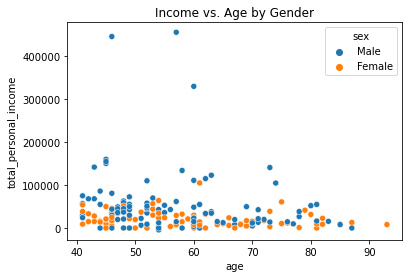

In [182]:
import seaborn as sns
sns.scatterplot(data=df, x='age',
                         y='total_personal_income',
                         hue='sex').set(title = 'Income vs. Age by Gender')

In [ ]:
# t-test

In [188]:
from scipy.stats import ttest_ind

In [191]:

male = df[df['sex']=='Male']['total_personal_income']
female = df[df['sex']=='Female']['total_personal_income']

ttest_ind(male,female)

Ttest_indResult(statistic=4.3014282614276125, pvalue=2.6932012217299565e-05)

In [200]:
from statsmodels.formula.api import ols
import numpy as np

In [205]:
# model=ols("total_personal_income~age+np.power(age,2)", df).fit()
model=ols("total_personal_income~age", df).fit()

In [206]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     total_personal_income   R-squared:                       0.022
Model:                               OLS   Adj. R-squared:                  0.017
Method:                    Least Squares   F-statistic:                     4.430
Date:                   Tue, 07 Feb 2023   Prob (F-statistic):             0.0366
Time:                           05:03:08   Log-Likelihood:                -2410.7
No. Observations:                    195   AIC:                             4825.
Df Residuals:                        193   BIC:                             4832.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.751e+04 

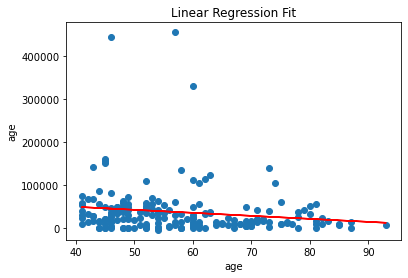

In [209]:
df['y_hat'] = model.predict(df[['age']])

# Plot the data and the regression line
plt.scatter(x=df['age'], y=df['total_personal_income'])
plt.plot(df['age'], df['y_hat'], color='red', linewidth=1.5)
plt.xlabel('age')
plt.ylabel('age')
plt.title('Linear Regression Fit')
plt.show()

## That's It! 
## Thank You All!

## Questions? 

## Presentedr by: Da Gong
##    $~~~~~~~~~~~~~~~~~~~~~~~$ PhD Candidate in Economics / GradQuant Lead Consultant
### $~~~~~~~~~~~~~~~~~~~~~~~~~~~~$  dgong005@ucr.edu &nbsp; /&nbsp; gradquant@ucr.edu

## Please Visit  <br>
## https://live-ucr-gradquant.pantheonsite.io/programs/workshops/winter-2023 <br>
## for More Workshops Information

## Forthcoming Python Track : 

## Visualization in Python 

### Wednesday, 2/22

### 10:00am - 11:50am

###  Zoom

## Data Management With Python: Pandas and More

### Tuesday, 3/7

### 2:00pm - 3:50pm

### LFSC 1425